In [1]:
import numpy as np
import torch
from Noise import *
import torchvision.transforms.functional as TF
from utils import *
import torchvision.transforms as transforms
 
def transform_convert(img_tensor, transform):
    """
    param img_tensor: tensor
    param transforms: torchvision.transforms
    """
    img_tensor=(img_tensor+1)/2
    
    if len(img_tensor)!=3:
        img_tensor = img_tensor[0]
    img_tensor = img_tensor.transpose(0,2).transpose(0,1)  # C x H x W  ---> H x W x C
    
    if 'ToTensor' in str(transform) or img_tensor.max() < 1:
        img_tensor = img_tensor.cpu().detach().numpy()*255
    
    if isinstance(img_tensor, torch.Tensor):
    	img_tensor = img_tensor.numpy()
    
    if img_tensor.shape[2] == 3:
        img = Image.fromarray(img_tensor.astype('uint8')).convert('RGB')
    elif img_tensor.shape[2] == 1:
        img = Image.fromarray(img_tensor.astype('uint8')).squeeze()
    else:
        raise Exception("Invalid img shape, expected 1 or 3 in axis 2, but got {}!".format(img_tensor.shape[2]))
        
    return img
def randomCrop(img, height, width):
    assert img.shape[0] >= height
    assert img.shape[1] >= width
    x = np.random.randint(0, img.shape[1] - width)
    y = np.random.randint(0, img.shape[0] - height)
    img = img[y:y+height, x:x+width]
    return img
image_pil1 = Image.open(r'..\..\mechine_learning\HiDDeN-master\data\train2017\000000000025.jpg')
image_pil2= Image.open(r'..\..\mechine_learning\HiDDeN-master\data\train2017\000000000009.jpg')



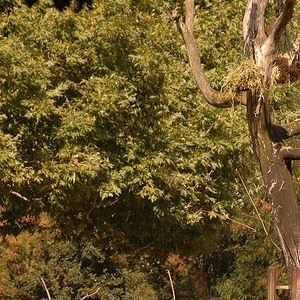

In [2]:
image_pil1 = randomCrop(np.array(image_pil1), 300, 300)
image_pil2 = randomCrop(np.array(image_pil2), 300, 300)
def img2tensor(image_pil):
    image_pil=np.array(image_pil)
    device = torch.device('cuda')
    image_tensor=TF.to_tensor(image_pil).to(device)
    image_tensor = image_tensor * 2 - 1
    image_tensor.unsqueeze_(0)
    return image_tensor
image_tensor1=img2tensor(image_pil1)
image_tensor2=img2tensor(image_pil2)
img0=transform_convert(image_tensor1, 'ToTensor')
img0

In [3]:
contrast_img,info = randomNoise(image_tensor1,'low')
img=transform_convert(contrast_img, 'ToTensor')

{'Crop': {'p': 0.94}, 'Contrast': {'duibi': 0.65, 'liagndu': 26.56}}


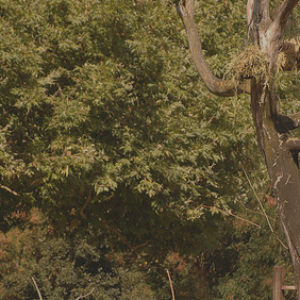

In [4]:
print(info)
img

In [6]:
noise_image = torch.from_numpy(res2.transpose((2, 0, 1))).type(torch.FloatTensor).cuda()  # 配合HiDDeN -1到1 的归一化
batch_noise_image = Variable(noise_image, requires_grad=True).cuda()
batch_noise_image = batch_noise_image / 255
batch_noise_image = batch_noise_image * 2 - 1  # 配合HiDDeN -1到1 的归一化

NameError: name 'res2' is not defined

In [24]:
import random
num=random.randint(0.5,1.7)


ValueError: non-integer arg 1 for randrange()

In [84]:
def do_something_with(func_name, arg):
    return func_name(arg)

In [85]:
contrast_img=do_something_with(Contrast, image_tensor1)